## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [3]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')

df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
# 문자로 된 범주형 데이터를 숫자로 변환한 컬럼 추가
df_iris['Species_No'] = df_iris['Species'].apply(lambda x: 0 if 'setosa' == x 
                                                     else( 1 if 'versicolor' == x
                                                     else 2 ))

df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_No
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,2
147,6.3,2.5,5.0,1.9,virginica,2
148,6.5,3.0,5.2,2.0,virginica,2
149,6.2,3.4,5.4,2.3,virginica,2


## data 정보 확인

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
 5   Species_No    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


# x값(예측변수), y값(목표변수) 설정

In [6]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , 0:4 ]
y = df_iris.iloc[:, 4 ]

# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({'versicolor': 37, 'setosa': 35, 'virginica': 33})

Counter({'virginica': 17, 'setosa': 15, 'versicolor': 13})


In [10]:
x_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
100,5.7,2.8,4.1,1.3
140,6.9,3.1,5.4,2.1
115,5.8,2.8,5.1,2.4
92,6.1,3.0,4.6,1.4
118,7.7,3.8,6.7,2.2
...,...,...,...,...
135,6.1,2.6,5.6,1.4
136,7.7,3.0,6.1,2.3
114,5.7,2.5,5.0,2.0
1,5.1,3.5,1.4,0.2


# 모델 생성 및 학습

## kNN 모델 생성
- `sklearn.neighbors.KNeighborsClassifier()`  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [12]:
# knn 모델 생성
model_knn = KNeighborsClassifier()  # n_neighbors : int, default=5
                                    # weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
                                    # metric: str or callable, default=’minkowski’

## train 데이터로 학습 수행
- `.fit()`  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit

In [13]:
# k = 15, weight = 'distance' 조건으로 모델 학습
model_knn.fit( x_train, y_train )

KNeighborsClassifier()

In [14]:
# 모델의 정답에 대한 정보 확인
model_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 예측 및 평가

## 학습된 모델로 예측 수행
- `.predict()`  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict

In [10]:
# 새로운 테스트 데이터로 예측하기
model_knn.predict( [ [5.1, 3.5, 4.0, 0.2] ] )

array(['versicolor'], dtype=object)

In [34]:
# test 데이터로 라벨 예측
y_pred = model_knn.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

,y_True,y_Predict,Pred_Result
37,setosa,setosa,True
32,setosa,setosa,True
141,virginica,virginica,True
5,setosa,setosa,True
122,virginica,virginica,True
40,setosa,setosa,True
130,virginica,virginica,True
144,virginica,virginica,True
150,virginica,virginica,True
120,virginica,versicolor,False


## 평가

### Confusion Metrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [12]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,setosa,versicolor,virginica
pred,,,
setosa,15,0,0
versicolor,0,13,0
virginica,0,2,15


In [13]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 15]], dtype=int64)

### 분석 지표
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score

- `sklearn.metrics.accuracy_score()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [14]:
# Accuracy
model_knn.score( x_test, y_test )

0.9555555555555556

In [15]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9555555555555556

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.867     1.000     0.929        13
   virginica      1.000     0.882     0.938        17

    accuracy                          0.956        45
   macro avg      0.956     0.961     0.955        45
weighted avg      0.961     0.956     0.956        45




### [미해결: 다중클래스에 대한 ROC, 사이킷런 가이드의 결과와 다르게 나옴] ROC curve / AUC
- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고!] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

AUC:  1.0



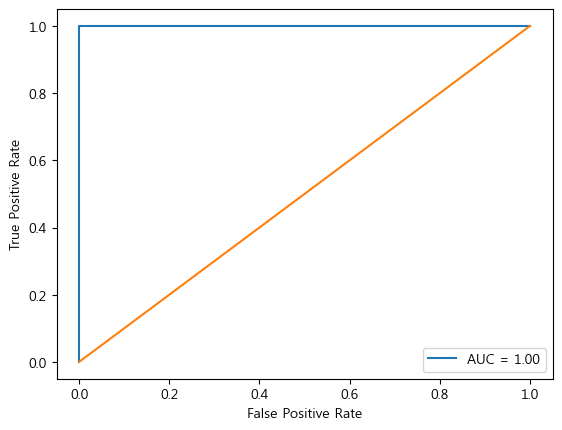

In [16]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 'setosa', 1, 0 )
y_pred_1 = np.where( y_pred == 'setosa', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

AUC:  0.96875



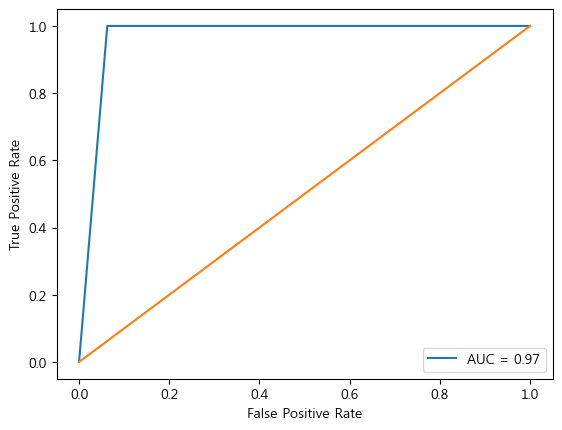

In [17]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 'versicolor', 1, 0 )
y_pred_2 = np.where( y_pred == 'versicolor', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

AUC:  0.9411764705882353



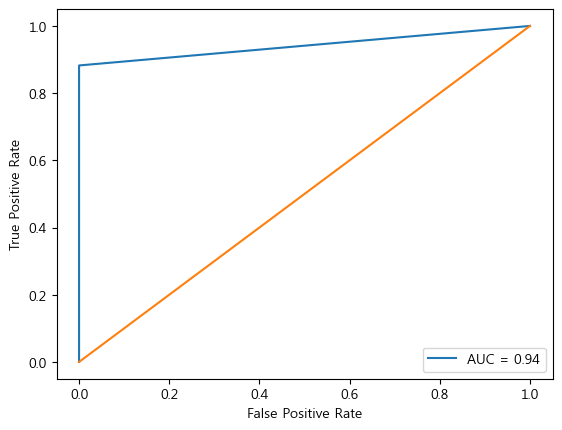

In [18]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 'virginica', 1, 0 )
y_pred_3 = np.where( y_pred == 'virginica', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

In [19]:
print(AA)

NameError: name 'AA' is not defined

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`
- 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### 파라미터 확인 및 평가 조건 설정
- `get_params()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [20]:
# 파라미터 목록 확인
list( model_knn.get_params().keys() )

['algorithm',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'weights']

In [24]:
# 평가할 파라미터 split 조건 설정

params = { 'n_neighbors' : list(range(1,25)),
           'weights' : ['uniform', 'distance'],
           'metric' : ['minkowski', 'euclidean'] }

grid = GridSearchCV( model_knn,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy')

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      96 non-null     float64
 1   std_fit_time       96 non-null     float64
 2   mean_score_time    96 non-null     float64
 3   std_score_time     96 non-null     float64
 4   param_metric       96 non-null     object 
 5   param_n_neighbors  96 non-null     object 
 6   param_weights      96 non-null     object 
 7   params             96 non-null     object 
 8   split0_test_score  96 non-null     float64
 9   split1_test_score  96 non-null     float64
 10  split2_test_score  96 non-null     float64
 11  split3_test_score  96 non-null     float64
 12  split4_test_score  96 non-null     float64
 13  split5_test_score  96 non-null     float64
 14  split6_test_score  96 non-null     float64
 15  split7_test_score  96 non-null     float64
 16  split8_test_score  96 non-nu

In [26]:
pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score', 'std_test_score', 'rank_test_score'] ].sort_values(['rank_test_score'])

,params,mean_test_score,std_test_score,rank_test_score
46,"{'metric': 'minkowski', 'n_neighbors': 24, 'weights': 'uniform'}",0.971818,0.043112,1
94,"{'metric': 'euclidean', 'n_neighbors': 24, 'weights': 'uniform'}",0.971818,0.043112,1
67,"{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}",0.962727,0.045717,3
65,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}",0.962727,0.045717,3
64,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.962727,0.045717,3
...,...,...,...,...
24,"{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}",0.953636,0.046435,85
66,"{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}",0.952727,0.047378,93
18,"{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}",0.952727,0.047378,93
50,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",0.933636,0.043608,95


### 최적의 파라미터 추출
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [27]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.9718
최적 Parameters:  {'metric': 'minkowski', 'n_neighbors': 24, 'weights': 'uniform'}
최적 Estimators:  KNeighborsClassifier(n_neighbors=24)


### 최적 Parameter 조건으로 모델 생성 및 학습

In [28]:
# knn 모델 생성
model_knn = KNeighborsClassifier( n_neighbors = 24,
                                  weights='uniform',
                                  metric = 'minkowski')

# 모델 학습
model_knn.fit( x_train, y_train )

KNeighborsClassifier(n_neighbors=24)

## 최적화된 모델로 예측 수행
- `.predict()`  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict

In [29]:
# test 데이터로 라벨 예측
y_pred = model_knn.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head()

,y_True,y_Predict,Pred_Result
37,setosa,setosa,True
32,setosa,setosa,True
141,virginica,virginica,True
5,setosa,setosa,True
122,virginica,virginica,True


## 평가

### Confusion Metrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [30]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,setosa,versicolor,virginica
pred,,,
setosa,15,0,0
versicolor,0,13,0
virginica,0,4,13


In [31]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  4, 13]], dtype=int64)

### 분석 지표
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score

- `sklearn.metrics.accuracy_score()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [32]:
# Accuracy
model_knn.score( x_test, y_test )

0.9111111111111111

In [33]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9111111111111111

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.765     1.000     0.867        13
   virginica      1.000     0.765     0.867        17

    accuracy                          0.911        45
   macro avg      0.922     0.922     0.911        45
weighted avg      0.932     0.911     0.911        45




### [미해결: 다중클래스에 대한 ROC, 사이킷런 가이드의 결과와 다르게 나옴] ROC curve / AUC
- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고!] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [ ]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 'setosa', 1, 0 )
y_pred_1 = np.where( y_pred == 'setosa', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

In [ ]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 'versicolor', 1, 0 )
y_pred_2 = np.where( y_pred == 'versicolor', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 'virginica', 1, 0 )
y_pred_3 = np.where( y_pred == 'virginica', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

# 시각화

## 2차원 시각화를 위한 x값(예측변수), y값(목표변수) 설정

In [ ]:
# 목표변수와 나머지 변수들을 따로 저장

x = df_iris.iloc[ : , [2, 3] ]
y = df_iris.iloc[:, 4 ]

In [ ]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

## `ListedColormap()` 및 `contourf()`을 사용하여 시각화
- `matplotlib.colors.ListedColormap()`
- https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
- 
- `matplotlib.pyplot.contourf()`
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

In [ ]:
# step size in the mesh
h = .02  # 수치가 작을 수록 섬세한 경계를 그리지만 연산 시간이 오래 걸린다.

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']


# weight function에 따라 결과를 따로 시각화 하는 함수
for k, w in zip( [15, 15], ['uniform', 'distance'] ):
    
    # create an instance of Neighbours Classifier and fit the data.
    model_knn = knn(k, w).fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
    y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    z = model_knn.predict( np.c_[xx.ravel(), yy.ravel()] )
    
    z = np.where( z == 'setosa', 2, z )
    z = np.where( z == 'versicolor', 0, z )
    z = np.where( z == 'virginica', 1, z )
    
    
    # Put the result into a color plot
    z = z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, cmap = cmap_light)

    # Plot also the training points
    sb.scatterplot( x = x_train.iloc[:, 0],
                    y = x_train.iloc[:, 1],
                    hue = y_train,
                    palette = cmap_bold, alpha = 1.0, edgecolor="black")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, w))
    plt.xlabel(x_train.columns[0])
    plt.ylabel(x_train.columns[1])

plt.show()